In [54]:
import kagglehub

path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results", path="athlete_events.csv")

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(path)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [56]:
# Task: Compute a 95% confidence interval for the average height of Olympic athletes.

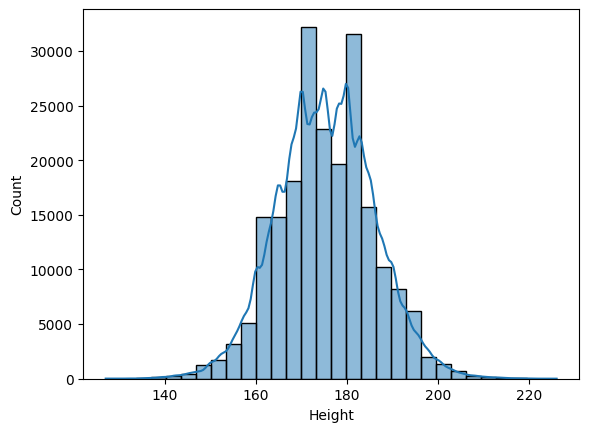

In [57]:
# Lets clean the height data first

sns.histplot(df['Height'], bins=30, kde = True)
plt.show()

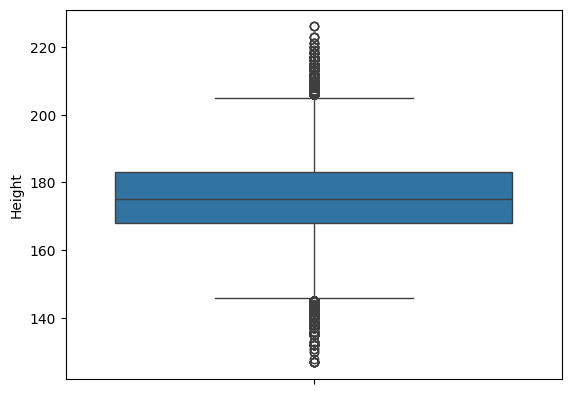

In [58]:
sns.boxplot(df['Height'])
plt.show()

In [59]:
df.fillna({
    'Height': df['Height'].mean()
}, inplace=True)

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00000,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


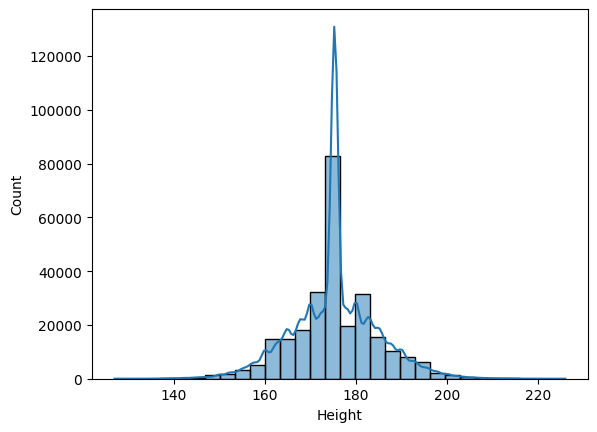

In [60]:
sns.histplot(df['Height'], bins=30, kde = True)
plt.show()

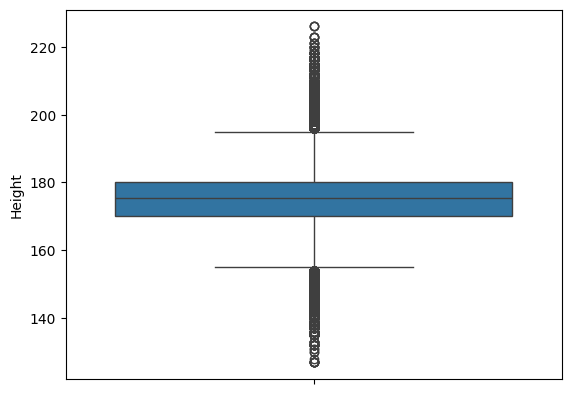

In [61]:
sns.boxplot(df['Height'])
plt.show()

In [62]:
# Remove outliers using IQR
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

height_df_without_outliers = df[(df['Height'] >= low) & (df['Height'] <= high)]
height_df_without_outliers.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00000,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [63]:
# Find 95% confidence interval
# With outliers result was: {Adding here just so that we can compare}
# Lower bound: 175.3220418639793
# Upper bound: 175.35589788334815
import math

sample_mean = height_df_without_outliers['Height'].mean()
confidence_val = 0.95
sample_std = height_df_without_outliers['Height'].std()
sample_size = len(height_df_without_outliers['Height']) - 1

lower_bound = sample_mean - confidence_val * (sample_std / math.sqrt(sample_size))
upper_bound = sample_mean + confidence_val * (sample_std / math.sqrt(sample_size))

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: 175.2139322606715
Upper bound: 175.24357976054407


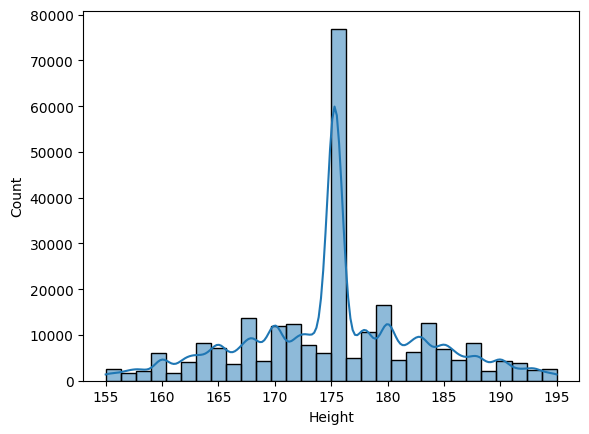

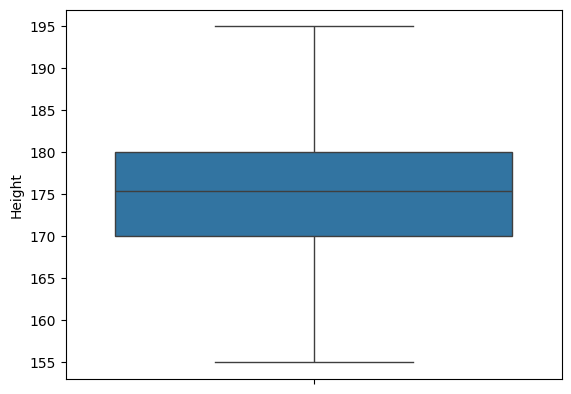

In [64]:
sns.histplot(height_df_without_outliers['Height'], bins=30, kde=True)
plt.show()

sns.boxplot(height_df_without_outliers['Height'])
plt.show()

In [65]:
# Task: Find the margin of error in estimating the average weight of sprinters vs. weightlifters.
# Weightlifting, Athletics

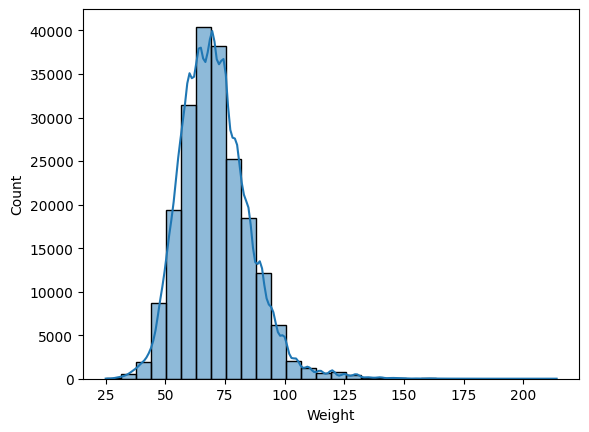

In [66]:
sns.histplot(df['Weight'], bins=30, kde=True)
plt.show()

In [67]:
df['Weight'] = df['Weight'].interpolate()

In [68]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,67.333333,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,74.666667,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


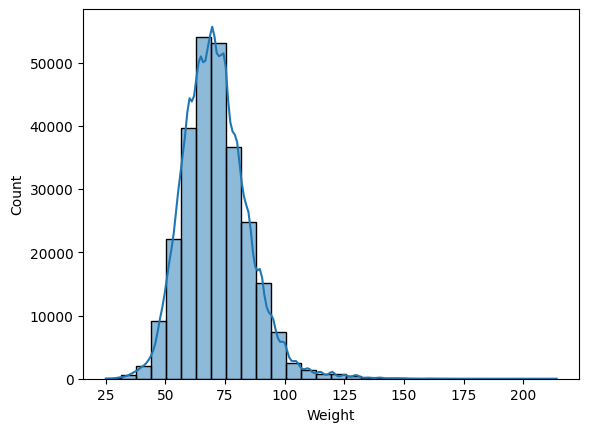

In [69]:
sns.histplot(df['Weight'], bins=30, kde=True)
plt.show()

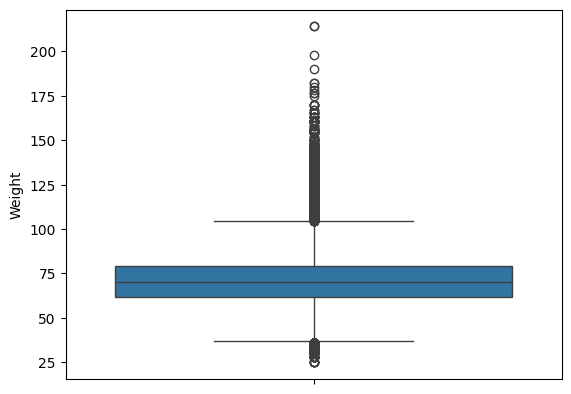

In [70]:
sns.boxplot(df['Weight'])
plt.show()

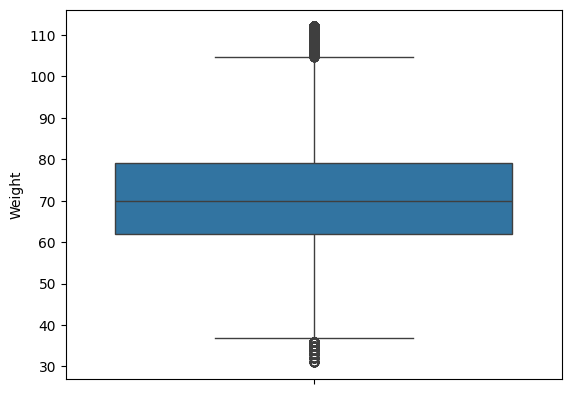

In [71]:
# Lets remove outliers from weight using ZScore method

df['ZScore_Weight'] = np.abs(stats.zscore(df['Weight']))

df = df.where(df['ZScore_Weight'] < 3)

sns.boxplot(df['Weight'])
plt.show()

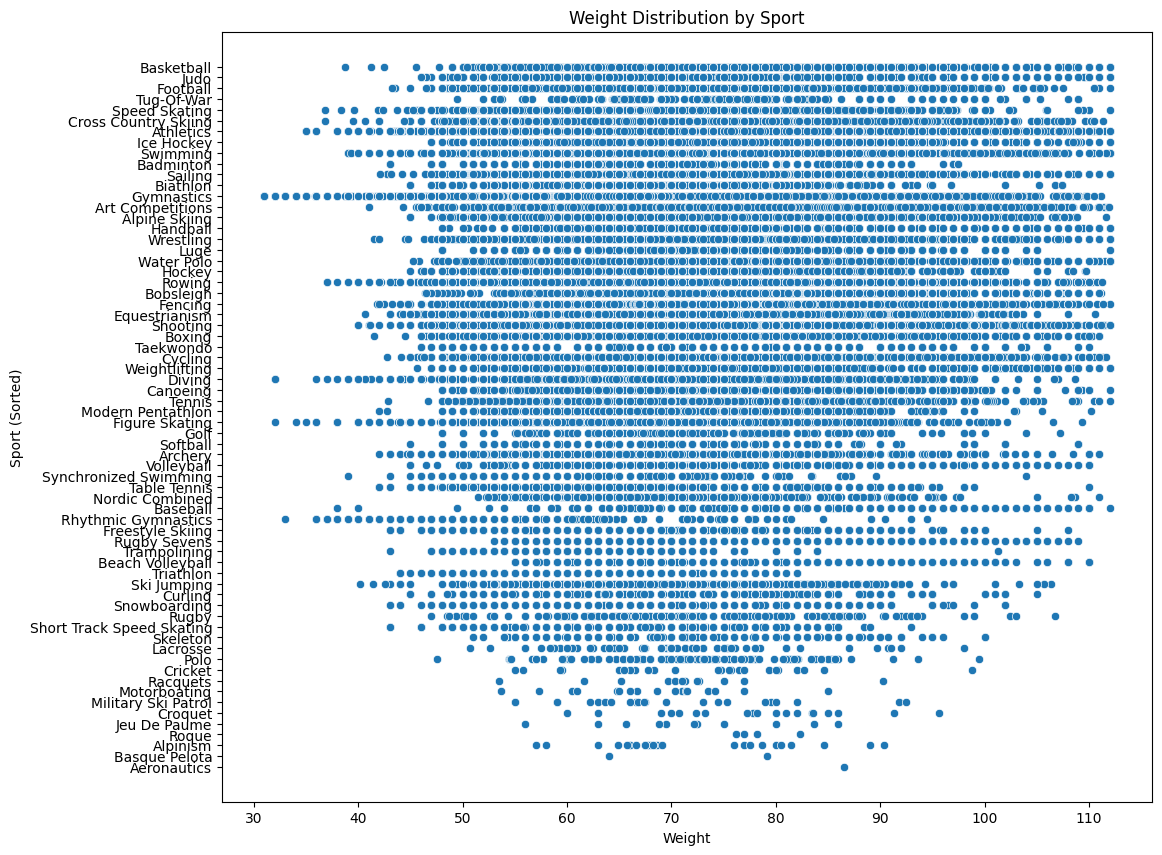

In [73]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Weight', y='Sport', data=df)
plt.xlabel("Weight")
plt.ylabel("Sport (Sorted)")
plt.title("Weight Distribution by Sport")
plt.show()


In [74]:
# Filtered data which only contain sprinters and weightlifters
df_weightlifting = df[(df['Sport'] == 'Weightlifting')]
df_sprinters = df[(df['Sport'] == 'Athletics')]

print(f'Avg weight of a weightlifter: {df_weightlifting['Weight'].mean()}')
print(f'Avg weight of a sprinter: {df_sprinters['Weight'].mean()}')

Avg weight of a weightlifter: 74.28073950151156
Avg weight of a sprinter: 68.49007160788058


In [75]:
# Calculate MOE for this calc.

In [76]:
from scipy import stats

n_we = len(df_weightlifting['Weight'])
n_sp = len(df_sprinters['Weight'])

s_we = df_weightlifting['Weight'].std()
s_sp = df_sprinters['Weight'].std()

t_we = stats.t.ppf(0.95, df = n_we - 1)
t_sp = stats.t.ppf(0.95, df = n_sp - 1)


moe_we = t_we * (s_we / np.sqrt(n_we))
moe_sp = t_sp * (s_sp / np.sqrt(n_sp))

print(moe_we)
print(moe_sp)
# Both the MOEs are pretty good. But here we can say for sure that weights of weightlifters has more spread then athletes thus making
# weight destribution of aathletes more even
# We can visualise that in the below hists as well
# Result with outliers
# 0.5851784123241609
# 0.12432936289500336

0.44100514678284175
0.1051328105999154


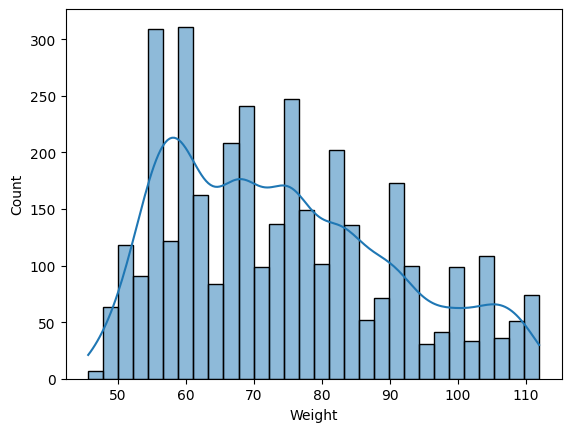

In [77]:
sns.histplot(df_weightlifting['Weight'], bins=30, kde=True)
plt.show()

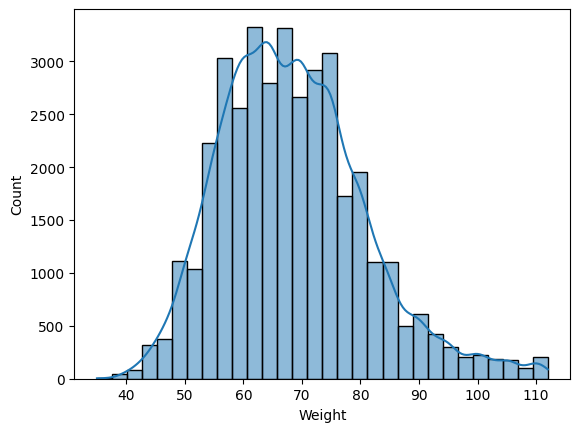

In [78]:
sns.histplot(df_sprinters['Weight'], bins=30, kde=True)
plt.show()